In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.preprocessing import normalize
from nltk.stem import WordNetLemmatizer


In [2]:
df = pd.read_csv('../Datasets/df_all_linkedin.csv', index_col=0)

In [3]:
descriptions = df['Description'].values

In [105]:
descriptions

array(["Join ABB and work in a team that is dedicated to creating a future where innovative digital technologies allow greater access to cleaner energy.ABB (ABBN: SIX Swiss Ex) is a technology leader that is driving the digital transformation of industries. With a history of innovation spanning more than 130 years, ABB has four customer-focused, globally leading businesses: Electrification, Industrial Automation, Motion, and Robotics & Discrete Automation, supported by the ABB Ability™ digital platform. ABB’s Power Grids business will be divested to Hitachi in 2020. ABB operates in more than 100 countries with about 147,000 employees. www.abb.comABB is seeking a Data Acquisition Developer for its Broomfield, Colorado location. This role is responsible for designing, developing and maintaining of code within our Oracle, SQL Server and Azure Data platforms to directly support a complex cloud-based customer application. This individual will work on a team of talented engineers responsible

In [ ]:
#text processing idea: only take the bottom 2/3 of the description beause the top is pretty much different every time.

In [39]:
vectorizer = CountVectorizer(stop_words='english', min_df=.15, max_df=0.75, max_features=100000)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=.70, min_df=.15, max_features=100000)
tfidf = tfidf_vectorizer.fit_transform(descriptions).toarray()
tf = vectorizer.fit_transform(descriptions)

# norm_tfidf = normalize(tfidf)  # don't think I need to normalize because the idf in tdf-idf normalizes

array([ 2.28266949e-02,  2.14903854e-02,  3.58657911e-02, -1.35232099e-02,
       -4.23308745e-02, -4.50109875e-03,  5.85789623e-02, -2.79667482e-02,
       -2.16585007e-02, -1.14016863e-02, -2.28711730e-02,  1.51490302e-03,
        4.37684075e-02,  3.40830191e-02,  1.71605460e-02, -1.70654146e-03,
       -3.30858599e-02,  5.57411605e-02, -7.14582173e-03, -5.43790476e-03,
       -2.82788066e-02, -1.96662077e-02,  2.33867523e-02,  2.53508670e-02,
        1.13496176e-02, -1.30878676e-02,  6.62150745e-03, -8.14738369e-03,
       -1.69868205e-02, -1.10295181e-03,  3.82533231e-02, -2.61835487e-02,
        5.63045787e-03,  4.96284945e-03,  4.40812443e-03, -2.30101321e-02,
       -3.05723632e-02, -2.28911620e-02, -2.43419530e-02,  5.23865891e-03,
        1.57114791e-03, -1.39267211e-03, -1.10465397e-02, -1.53570181e-02,
        3.33637264e-03,  3.02568401e-02, -9.06826437e-03, -3.65672018e-02,
        1.82894965e-02, -2.60456832e-02, -2.55785717e-02,  8.99304548e-03,
        3.12128480e-02,  

In [34]:
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

In [35]:
kmeans.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [36]:
sorted_centroids = []
for cluster in kmeans.cluster_centers_:
    top_10 = np.argsort(cluster)[::-1]
    sorted_centroids.append(top_10[:10])


for idx, c in enumerate(sorted_centroids): 
    print(f'\nCluster {idx}\n')
    for idx in c: 
        print(tfidf_vectorizer.get_feature_names()[idx]) 


Cluster 0

software
engineering
development
product
technology
technical
systems
design
products
new

Cluster 1

learning
machine
models
ai
company
scientist
deep
working
python
aws

Cluster 2

research
equivalent
position
systems
education
computer
techniques
required
program
level

Cluster 3

ancestry
family
employment
join
technology
gender
applicable
customer
looking
qualified

Cluster 4

analytics
analysis
marketing
statistical
ability
insights
management
analytical
research
product


In [38]:
silhouette_score(tfidf, kmeans.labels_)

0.04790431788576881

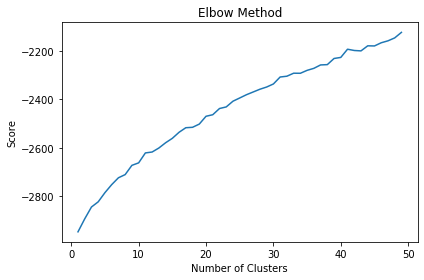

In [6]:
number_clusters = range(1, 50)

kmeans = [KMeans(n_clusters=i, max_iter = 600, n_jobs=-1) for i in number_clusters]
kmeans

score = [kmeans[i].fit(norm_tfidf).score(norm_tfidf) for i in range(len(kmeans))]
score

fig, ax = plt.subplots()
ax.plot(number_clusters, score)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.set_title('Elbow Method')
plt.tight_layout()

In [103]:
k_values = [i for i in range(2,50)]
ss_values = []

for i in range(2,50):
    kmeans = KMeans(n_clusters=i, n_jobs=-1, random_state=0)
    kmeans.fit(tfidf)
    silo_score = silhouette_score(tfidf, kmeans.labels_)
    ss_values.append(silo_score)

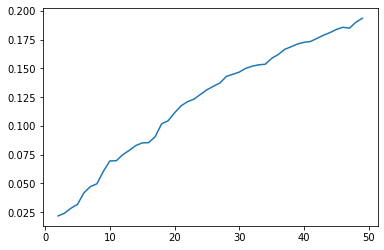

In [104]:
fig, ax = plt.subplots()
ax.plot(k_values, ss_values)

In [70]:
pca = PCA(n_components=500, random_state=0)
pca_tfidf = pca.fit_transform(tfidf)

In [71]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

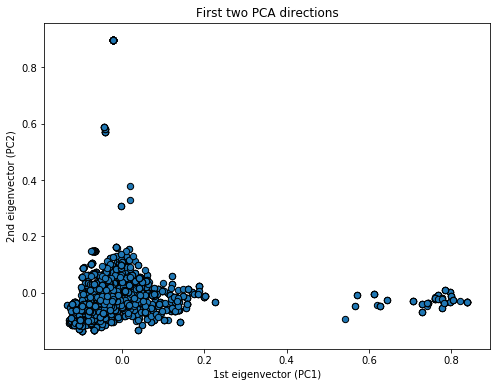

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

In [44]:
feature_names = vectorizer.get_feature_names()
feature_names_string = ' '.join(feature_names)
feature_names_string

'ability able action advanced age ai algorithms analysis analytical analytics analyze ancestry applicable applicants application applications applied apply applying areas aws bachelor background based basic benefits best better big bring build building business businesses candidate candidates capabilities career challenges change class client clients closely cloud code collaborate collaborative color com committed communicate communication company competitive complex computer computing concepts consider core create creating creative critical cross culture current customer customers database databases day decision decisions deep degree deliver delivering delivery demonstrated design designing develop developing development different disability discipline distributed diverse drive driven dynamic economics edge education effectively employee employees employer employment enable end engineer engineering engineers ensure enterprise environment equal equivalent excellent existing experiences

In [39]:
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate(feature_names_string)

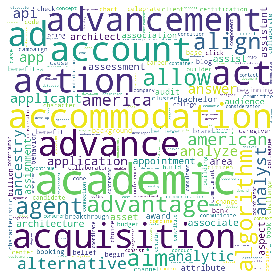

In [41]:
fig, ax = plt.subplots()
ax.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()

In [52]:
count_dict = {word: feature_names_string.count(word) for word in feature_names_string.split()}


In [58]:
sorted(count_dict.items(), key=lambda x: x[1], reverse=True)


[('er', 635),
 ('ed', 364),
 ('ar', 335),
 ('ic', 311),
 ('ve', 283),
 ('ca', 221),
 ('ma', 200),
 ('ll', 194),
 ('il', 165),
 ('ts', 165),
 ('ur', 154),
 ('ci', 139),
 ('ex', 133),
 ('men', 131),
 ('pl', 127),
 ('ad', 121),
 ('ab', 120),
 ('pro', 118),
 ('ut', 114),
 ('com', 112),
 ('id', 109),
 ('ai', 102),
 ('da', 95),
 ('ee', 93),
 ('bi', 89),
 ('ap', 87),
 ('ag', 85),
 ('ir', 80),
 ('pre', 76),
 ('cu', 68),
 ('ba', 67),
 ('era', 67),
 ('ui', 66),
 ('act', 63),
 ('rm', 61),
 ('pi', 60),
 ('ds', 55),
 ('able', 54),
 ('age', 53),
 ('ga', 52),
 ('end', 50),
 ('art', 47),
 ('des', 47),
 ('rate', 44),
 ('wa', 41),
 ('app', 39),
 ('scr', 39),
 ('ms', 37),
 ('sit', 37),
 ('inter', 36),
 ('form', 35),
 ('cs', 34),
 ('log', 33),
 ('eco', 32),
 ('gs', 30),
 ('ph', 29),
 ('fl', 28),
 ('edu', 27),
 ('fin', 26),
 ('ext', 24),
 ('ngs', 24),
 ('lab', 23),
 ('oti', 23),
 ('bs', 22),
 ('script', 22),
 ('led', 21),
 ('met', 21),
 ('use', 21),
 ('sci', 20),
 ('ski', 20),
 ('ability', 19),
 ('car', 19

In [201]:
feature_names_string.count('yoga')

1

{'00': 1,
 '000': 1,
 '001': 1,
 '01': 1,
 '05': 1,
 '07': 1,
 '074': 1,
 '09': 1,
 '10': 1,
 '100': 1,
 '1000': 1,
 '10060': 1,
 '100mm': 1,
 '100ms': 1,
 '101': 1,
 '11': 1,
 '110': 1,
 '1111': 1,
 '12': 1,
 '120': 1,
 '1200': 1,
 '120khealth': 1,
 '13': 1,
 '14': 1,
 '15': 1,
 '150': 1,
 '1500': 1,
 '1550': 1,
 '16': 1,
 '160': 1,
 '16descriptioninnovate': 1,
 '17': 1,
 '170': 1,
 '18': 1,
 '180': 1,
 '185': 1,
 '1869': 1,
 '19': 1,
 '190': 1,
 '190k': 1,
 '1920s': 1,
 '19position': 1,
 '20': 1,
 '200': 1,
 '2009': 1,
 '2012': 1,
 '2017': 1,
 '2018': 1,
 '2019': 1,
 '2019unposting': 1,
 '2020': 1,
 '2021': 1,
 '21': 1,
 '210': 1,
 '21st': 1,
 '23': 1,
 '230': 1,
 '23andme': 1,
 '24': 1,
 '25': 1,
 '250': 1,
 '260': 1,
 '2635': 1,
 '27': 1,
 '28': 1,
 '30': 1,
 '300': 1,
 '3326': 1,
 '35': 1,
 '365': 1,
 '37': 1,
 '3d': 1,
 '3rd': 1,
 '40': 1,
 '401': 1,
 '401k': 1,
 '45': 1,
 '450': 1,
 '50': 1,
 '500': 1,
 '55': 1,
 '5517952': 1,
 '60': 1,
 '600': 1,
 '65': 1,
 '70': 1,
 '7001': 1,

In [45]:
lda = LatentDirichletAllocation(n_components=10, 
                                max_iter=10, learning_method='online', 
                                random_state=0, verbose=True)

In [46]:
lda.fit(tf)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=True)

In [47]:
# lda.components_

array([[3.16438124e+02, 5.46647340e-01, 9.40251433e+00, ...,
        1.51755255e+02, 1.36965595e+01, 2.55713838e+02],
       [1.51835184e+00, 1.51776293e-01, 1.00507816e-01, ...,
        1.02248372e-01, 1.12870194e+03, 1.67696996e+02],
       [8.98895401e+02, 1.47634697e+02, 1.14906161e+02, ...,
        7.25586708e+01, 1.48414270e+02, 4.06042352e+02],
       ...,
       [1.64533745e+02, 1.21069817e+02, 2.54023471e+01, ...,
        2.81710975e+01, 2.31918811e+01, 7.17798165e+02],
       [2.06475728e+02, 2.22517133e+01, 1.82137983e+01, ...,
        2.33865076e+02, 1.57042458e+01, 3.77088048e+02],
       [1.28403982e+02, 1.27816027e+02, 1.43320741e+02, ...,
        1.03667069e+00, 3.17704408e+01, 5.88022713e+02]])

In [48]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic %d:' % (topic_idx))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        
        
num_top_words=10
display_topics(lda, feature_names, num_top_words)

Topic 0:
development techniques learning skills using statistical machine python programming systems
Topic 1:
equivalent computer systems position education level software required year knowledge
Topic 2:
business analytics product marketing teams insights customer drive strategy company
Topic 3:
business analysis statistical quantitative using statistics analytical scientist qualifications insights
Topic 4:
skills management support analysis ability project business information quality members
Topic 5:
business aws services technical solutions technology development analytics management new
Topic 6:
research related position analysis methods modeling including projects skills engineering
Topic 7:
learning machine models scientist ml deep company python ai working
Topic 8:
status ancestry employment gender protected disability national race origin color
Topic 9:
software engineering products systems build design new building engineers engineer


In [53]:
lemma = WordNetLemmatizer()
lemmatized_descriptions = []
for description in descriptions:
    temp_list = []
    for word in description.split():
        lemmatized_word = lemma.lemmatize(word)
        temp_list.append(lemmatized_word)
    lemmatized_description = ' '.join(temp_list)
    lemmatized_descriptions.append(lemmatized_description)
    

In [ ]:
lemmatized_descrip